In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
print("This is N=10 time steps with U being recorded every other time step")

This is N=10 time steps with U being recorded every other time step


In [3]:
x = np.linspace(0,2*pi,10)
t = np.array([0,0.349006,1.0472,1.74533,2.44346,3.14159])
U = np.array([[0,0.642788,0.984808,0.866025,0.34202,-0.34202,
-0.866025,-0.984808,-0.642788,0],[-0.160697
,0.396586
,0.928998
,1.02672
,0.644032
,-0.0400088
,-0.705329
,-1.04062
,-0.88899
,-0.160697],[-0.416751
,-0.143709
,0.528014
,1.06315
,1.11087
,0.638804
,-0.132168
,-0.831254
,-1.27195
,-0.545008],[-0.611803
,-0.565743
,-0.0980355
,0.669772
,1.20893
,1.19497
,0.609314
,-0.151592
,-1.29039
,-0.965418 ], [-0.821941
,-0.770387
,-0.666218
,-0.0281049
,0.827169
,1.37779
,1.20134
,0.831555
,-0.722333
,-1.22887],[-1.03522
,-0.830511
,-0.953755
,-0.733322
,0.0542705
,1.0687
,1.33084
,1.69875
,0.421882
,-1.02163]])

In [4]:
print(U[0])

[ 0.        0.642788  0.984808  0.866025  0.34202  -0.34202  -0.866025
 -0.984808 -0.642788  0.      ]


In [5]:
dx = x[1]-x[0]
dt = t[1]-t[0]

sol_0 = np.sin(x-t[0])

sol_1 = np.sin(x-t[1])

sol_2 = np.sin(x-t[2])

sol_3 = np.sin(x-t[3])

sol_4 = np.sin(x-t[4])

sol_5 = np.sin(x-t[5])


print(dx)
print(dt)

0.6981317007977318
0.349006


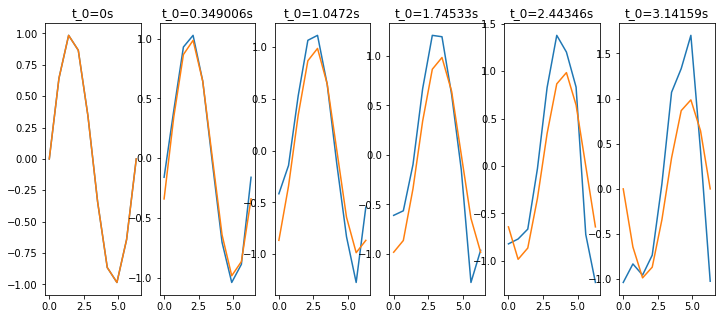

In [6]:
fig, ax = pyplot.subplots(1,6, figsize=(12, 5))
ax[0].set_title("t_0=0s")
ax[1].set_title("t_0="+str(t[1])+"s")
ax[2].set_title("t_0="+str(t[2])+"s")
ax[3].set_title("t_0="+str(t[3])+"s")
ax[4].set_title("t_0="+str(t[4])+"s")
ax[5].set_title("t_0="+str(t[5])+"s")
ax[0].plot(x,U[0])
ax[0].plot(x,sol_0)
ax[1].plot(x,U[1])
ax[1].plot(x,sol_1)
ax[2].plot(x,U[2])
ax[2].plot(x,sol_2)
ax[3].plot(x,U[3])
ax[3].plot(x,sol_3)
ax[4].plot(x,U[4])
ax[4].plot(x,sol_4)
ax[5].plot(x,U[5])
ax[5].plot(x,sol_5)

In [7]:
f_x = np.array([[abs(sol_0-U[0])],[abs(sol_1-U[1])],[abs(sol_2-U[2])],[abs(sol_3-U[3])],[abs(sol_4-U[4])],[abs(sol_5-U[5])]])
delta_x  = [None]*len(x)

for i in range(len(x)):
    delta_x[i] = max(x[i],dx)
    

<ipython-input-8-861f385b9c45>:1: RuntimeWarning: divide by zero encountered in log
  log_f = np.log(f_x[0])


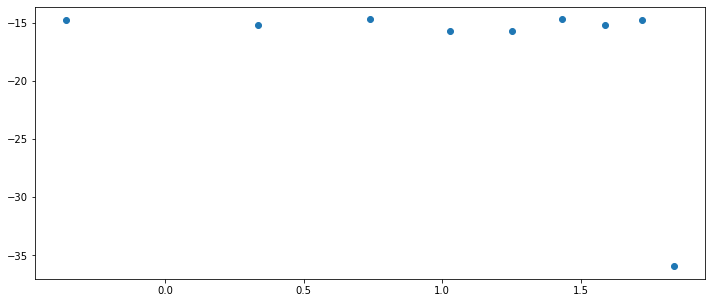

In [8]:
log_f = np.log(f_x[0])
log_delta= np.log(delta_x)


fig, ax = pyplot.subplots(1,1, figsize=(12, 5))
#ax.set_ylim(-20,-12)
ax.scatter(log_delta,log_f[0])

In [9]:
print(log_f)
print(log_delta)

[[        -inf -14.75631568 -15.21392693 -14.72238467 -15.75814639
  -15.75814639 -14.72238467 -15.21392693 -14.75631568 -35.94556183]]
[-0.35934751 -0.35934751  0.33379967  0.73926478  1.02694685  1.2500904
  1.43241196  1.58656264  1.72009403  1.83787707]


In [10]:
print((abs(log_f[0][9]-log_f[0][8]))/(log_delta[9]-log_delta[8]))

179.9006625880657


### The observation of the slope of the line above  varies with the largest being at the last time step and a convergence of 179.9. I also obeserved that with each sucessive time step the stability of the the Center differencing method  gets less stable. With the 10th and final time step being the least stable.

In [11]:
dUdx = [None]*len(U[0])

for i in range(len(U[0])):
    
    if i==(len(U[0])-1):
        dUdx[i] = (U[0][0]-U[0][i-1])/(2*dx)
        continue
    dUdx[i] = (U[0][i+1]-U[0][i-1])/(2*dx)

In [12]:
print(dUdx)

[0.46036299402068953, 0.7053167753839947, 0.1598817241395245, -0.46036299402068953, -0.8651984995235192, -0.8651984995235192, -0.46036299402068953, 0.1598817241395245, 0.7053167753839947, 0.46036299402068953]


In [13]:
dUdt = [None]*len(U[0])

for i in range(len(U[0])):
    dUdt[i] = -1*dUdx[i]

In [14]:
U_1 = [None]*len(U[0])
for i in range(len(U[0])):
    
    U_1[i] = U[0][i]+dUdt[i]*dt

In [15]:
print(U_1)

[-0.16066944709118477, 0.3966282134903336, 0.9290083189849612, 1.0266944470911847, 0.6439794675247053, -0.040060532475294675, -0.7053555529088152, -1.0406076810150389, -0.8889477865096664, -0.16066944709118477]


In [16]:
dUdx_1 = [None]*len(U_1)

for i in range(len(U_1)):
    
    if i==(len(U[0])-1):
        dUdx_1[i] = (U_1[0]-U_1[i-1])/(2*dx)
        continue
    dUdx_1[i] = (U_1[i+1]-U_1[i-1])/(2*dx)
    
    
dUdt_1 = [None]*len(U_1)

for i in range(len(U_1)):
    dUdt_1[i] = -1*dUdx_1[i]
    
U_2 = [None]*len(U_1)
for i in range(len(U_1)):
    
    U_2[i] = U_1[i]+dUdt_1[i]*dt

In [17]:
print(U_2)

[-0.2999699738447074, 0.12425548067171888, 0.7715187681789816, 1.097939442282686, 0.9106224862940574, 0.2972153838047638, -0.45526165391794704, -0.9947174922391371, -1.1088946267103845, -0.34270781452003163]
